<a href="https://colab.research.google.com/github/Rohithkr02/rohithkr2002projects/blob/main/Jobplacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dataset of jobplacement

In [1]:
import pandas as pd
df=pd.read_csv('/content/Job_Placement_Data.csv')
df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


Checking datatypes of each column

In [2]:
df.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

Count plot of status label

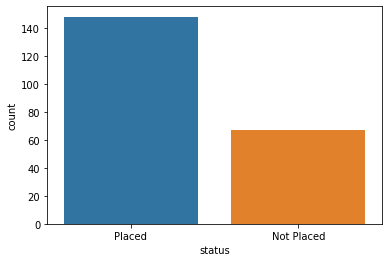

In [18]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.countplot('status',data=df)

Drop unnecessary columns

In [3]:
df.drop(['hsc_board','gender','ssc_board'],axis=1,inplace=True)

here create dummies of columns using get_dummies

In [4]:
dummy=pd.get_dummies(df[['undergrad_degree','hsc_subject','work_experience','specialisation']],drop_first=True)

Combine the two dataframe using concat

In [5]:
dfe=pd.concat([df,dummy],axis=1)

In [6]:
dfe.drop(['undergrad_degree','specialisation','work_experience','hsc_subject'],axis=1,inplace=True)

Checking null value of each columns

In [7]:
dfe.isna().sum()

ssc_percentage               0
hsc_percentage               0
degree_percentage            0
emp_test_percentage          0
mba_percent                  0
status                       0
undergrad_degree_Others      0
undergrad_degree_Sci&Tech    0
hsc_subject_Commerce         0
hsc_subject_Science          0
work_experience_Yes          0
specialisation_Mkt&HR        0
dtype: int64

Here divided the dataset into 2 features and labels.Then X contain featurs and y contain labels

In [8]:
X=dfe.drop(['status'],axis=1).values
y=dfe['status'].values

split train data and test data

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)


Applying algorithm naive bayes and create model.Then predict outcomes

In [10]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred


array(['Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Placed', 'Placed', 'Not Placed', 'Not Placed', 'Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Placed', 'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed'], dtype='<U10')

Calculate the accuracy,classification report and confusion matrix of model

87.6923076923077
              precision    recall  f1-score   support

  Not Placed       0.82      0.82      0.82        22
      Placed       0.91      0.91      0.91        43

    accuracy                           0.88        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.88      0.88      0.88        65



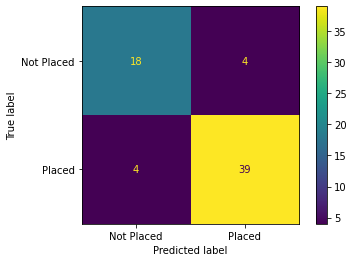

In [11]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))